<a href="https://colab.research.google.com/github/AshishPku/LogClassificationSystem/blob/main/Log_classification_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('dataset/synthetic_logs.csv') #read the csv
df

,timestamp,source,log_message,target_label,complexity
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert
...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,bert


In [ ]:
df.source.unique()


array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI', 'LegacyCRM'], dtype=object)

In [ ]:
df.target_label.unique()

array(['HTTP Status', 'Critical Error', 'Security Alert', 'Error',
       'System Notification', 'Resource Usage', 'User Action',
       'Workflow Error', 'Deprecation Warning'], dtype=object)

In [ ]:
df[df.target_label=='System Notification'].sample(10)

,timestamp,source,log_message,target_label,complexity
1002,3/1/2025 7:52,ModernCRM,Disk cleanup completed successfully.,System Notification,regex
163,6/6/2025 15:29,BillingSystem,System reboot initiated by user User938.,System Notification,regex
1362,2/4/2025 16:26,ModernCRM,File data_7160.csv uploaded successfully by us...,System Notification,regex
1963,10/20/2025 14:55,AnalyticsEngine,Backup completed successfully.,System Notification,regex
1090,1/25/2025 13:55,ThirdPartyAPI,Disk cleanup completed successfully.,System Notification,regex
516,10/7/2025 10:31,BillingSystem,Disk cleanup completed successfully.,System Notification,regex
365,10/20/2025 22:32,ModernHR,System reboot initiated by user User533.,System Notification,regex
96,12/7/2025 10:38,ModernCRM,Disk cleanup completed successfully.,System Notification,regex
748,5/18/2025 13:51,ModernCRM,Backup completed successfully.,System Notification,regex
2116,12/12/2025 12:17,AnalyticsEngine,Backup completed successfully.,System Notification,regex


In [ ]:
df[df.log_message.str.startswith('System reboot initiated by user')]

,timestamp,source,log_message,target_label,complexity
36,11/19/2025 13:14,BillingSystem,System reboot initiated by user User243.,System Notification,regex
92,12/4/2025 21:20,BillingSystem,System reboot initiated by user User471.,System Notification,regex
139,5/8/2025 16:34,ModernHR,System reboot initiated by user User216.,System Notification,regex
140,9/11/2025 8:49,AnalyticsEngine,System reboot initiated by user User639.,System Notification,regex
161,3/31/2025 19:40,BillingSystem,System reboot initiated by user User819.,System Notification,regex
163,6/6/2025 15:29,BillingSystem,System reboot initiated by user User938.,System Notification,regex
307,4/12/2025 0:41,BillingSystem,System reboot initiated by user User929.,System Notification,regex
365,10/20/2025 22:32,ModernHR,System reboot initiated by user User533.,System Notification,regex
508,4/15/2025 2:04,ThirdPartyAPI,System reboot initiated by user User591.,System Notification,regex
552,9/22/2025 20:54,ModernHR,System reboot initiated by user User421.,System Notification,regex


In [ ]:
from sklearn.cluster import dbscan

In [ ]:
from sklearn.cluster import DBSCAN
from sentence_transformers import SentenceTransformer

In [ ]:
model=SentenceTransformer('all-MiniLM-L6-v2')
embeddings=model.encode(df['log_message'].tolist()) # converting input data (like text) into a numerical representation that ML model can process.

In [ ]:
embeddings[:5]

array([[-0.1029396 ,  0.03354595, -0.02202608, ...,  0.00457793,
        -0.04259716,  0.00322623],
       [ 0.00804573, -0.03573924,  0.04938739, ...,  0.01538321,
        -0.06230951, -0.02774664],
       [-0.00908221,  0.13003927, -0.05275569, ...,  0.02014104,
        -0.05117096, -0.02930295],
       [-0.09751045,  0.04911302, -0.03977428, ...,  0.02477501,
        -0.03546082, -0.00018599],
       [-0.10468338,  0.05926034, -0.02488501, ...,  0.02502053,
        -0.03719296, -0.02568914]], dtype=float32)

In [ ]:
clustering=DBSCAN(eps=0.2,min_samples=1,metric='cosine').fit(embeddings)
df['cluster']=clustering.labels_ #add one more column cluster which is cluster number

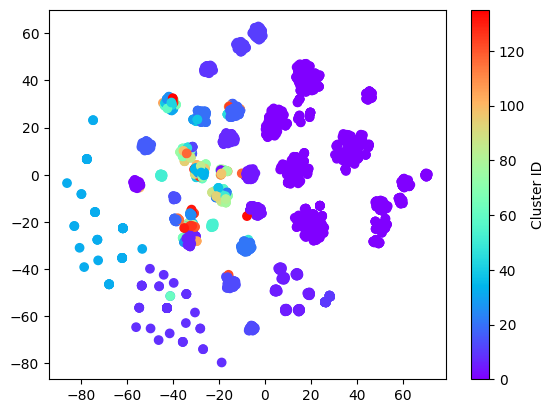

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE #(t-SNE) visualizes high-dimensional data in 2D or 3D

# Reduce embeddings to 2D for visualization
embeddings_2d = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(embeddings)
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], c=clustering.labels_, cmap='rainbow', alpha=1)
plt.colorbar(label="Cluster ID")
plt.show()


In [ ]:
df.head() #it shows top 5 rows.

,timestamp,source,log_message,target_label,complexity,cluster
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0


In [ ]:
clusters=df.groupby('cluster')['log_message'].apply(list)
sorted_clusters=clusters.sort_values(key=lambda x:x.map(len),ascending=False)

In [ ]:
print("Clustered Patterns:")
for cluster_id,messages in sorted_clusters.items():
  if len(messages)>10:
    print(f"Cluster {cluster_id}:")
    for message in messages[:5]:
      print(f"-{message}")

Clustered Patterns:
Cluster 0:
-nova.osapi_compute.wsgi.server [req-b9718cd8-f65e-49cc-8349-6cf7122af137 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" status: 200 len: 1893 time: 0.2675118
-nova.osapi_compute.wsgi.server [req-4895c258-b2f8-488f-a2a3-4fae63982e48 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" HTTP status code -  200 len: 211 time: 0.0968180
-nova.osapi_compute.wsgi.server [req-ee8bc8ba-9265-4280-9215-dbe000a41209 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" RCODE  200 len: 1874 time: 0.2280791
-nova.osapi_compute.wsgi.server [req-f0bffbc3-5ab0-4916-91c1-0a61dd7d4ec2 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54f

# Classification 1 : Using Regex **classification**

In [ ]:
import re
def classify_with_regex(log_message):
  regex_pattern={r"User User\d+ logged (in|out).": "User Action",
        r"Backup (started|ended) at .*": "System Notification",
        r"Backup completed successfully.": "System Notification",
        r"System updated to version .*": "System Notification",
        r"File .* uploaded successfully by user .*": "System Notification",
        r"Disk cleanup completed successfully.": "System Notification",
        r"System reboot initiated by user .*": "System Notification",
        r"Account with ID .* created by .*": "User Action"}
  for pattern,label in regex_pattern.items():
    if re.search(pattern,log_message):
      return label
  return None;

In [ ]:
print(classify_with_regex("User User1 logged in."))

User Action


In [ ]:
print(classify_with_regex("System reboot initiated by user User179."))

System Notification


In [ ]:
df['regex_level']=df['log_message'].apply(lambda x:classify_with_regex(x))
df[df['regex_level'].notnull()]

,timestamp,source,log_message,target_label,complexity,cluster,regex_level
7,10/11/2025 8:44,ModernHR,File data_6169.csv uploaded successfully by us...,System Notification,regex,4,System Notification
14,1/4/2025 1:43,ThirdPartyAPI,File data_3847.csv uploaded successfully by us...,System Notification,regex,4,System Notification
15,5/1/2025 9:41,ModernCRM,Backup completed successfully.,System Notification,regex,8,System Notification
18,2/22/2025 17:49,ModernCRM,Account with ID 5351 created by User634.,User Action,regex,9,User Action
27,9/24/2025 19:57,ThirdPartyAPI,User User685 logged out.,User Action,regex,11,User Action
...,...,...,...,...,...,...,...
2376,6/27/2025 8:47,ModernCRM,System updated to version 2.0.5.,System Notification,regex,21,System Notification
2381,9/5/2025 6:39,ThirdPartyAPI,Disk cleanup completed successfully.,System Notification,regex,32,System Notification
2394,4/3/2025 13:13,ModernHR,Disk cleanup completed successfully.,System Notification,regex,32,System Notification
2395,5/2/2025 14:29,ThirdPartyAPI,Backup ended at 2025-05-06 11:23:16.,System Notification,regex,13,System Notification


In [ ]:
df[df['regex_level'].isnull()].head()

,timestamp,source,log_message,target_label,complexity,cluster,regex_level
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0,None


# **Classification 2: a-> BERT**

In [ ]:
df_non_regex=df[df['regex_level'].isnull()].copy()
df_non_regex.shape

(1910, 7)

In [ ]:
df_legacy=df_non_regex[df_non_regex.source=='LegacyCRM']
df_legacy

,timestamp,source,log_message,target_label,complexity,cluster,regex_level
60,2025-10-06 16:55:23,LegacyCRM,Lead conversion failed for prospect ID 7842 du...,Workflow Error,llm,24,None
255,2025-05-03 16:55:35,LegacyCRM,API endpoint 'getCustomerDetails' is deprecate...,Deprecation Warning,llm,48,None
377,2025-06-24 12:16:29,LegacyCRM,Customer follow-up process for lead ID 5621 fa...,Workflow Error,llm,62,None
1325,2025-04-17 07:33:44,LegacyCRM,Escalation rule execution failed for ticket ID...,Workflow Error,llm,105,None
1734,2025-04-30 07:47:30,LegacyCRM,The 'ExportToCSV' feature is outdated. Please ...,Deprecation Warning,llm,118,None
1826,2025-01-23 10:33:36,LegacyCRM,Support for legacy authentication methods will...,Deprecation Warning,llm,122,None
2217,2025-05-12 09:46:54,LegacyCRM,Task assignment for TeamID 3425 could not comp...,Workflow Error,llm,133,None


In [ ]:
df_non_legacy=df_non_regex[df_non_regex.source!='LegacyCRM']
df_non_legacy

,timestamp,source,log_message,target_label,complexity,cluster,regex_level
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0,None
...,...,...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert,0,None
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert,7,None
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert,0,None
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,bert,1,None


In [ ]:
df_non_legacy.shape

(1903, 7)

In [ ]:
model=SentenceTransformer('all-MiniLM-L6-v2')
embeddings_filtered=model.encode(df_non_legacy['log_message'].tolist())

In [ ]:
len(embeddings_filtered)

1903

In [ ]:
X=embeddings_filtered
Y=df_non_legacy['target_label'].values

In [ ]:
Y

array(['HTTP Status', 'Critical Error', 'Security Alert', ...,
       'HTTP Status', 'Critical Error', 'Security Alert'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

Critical Error       0.91      1.00      0.95        48
         Error       0.98      0.89      0.93        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       1.00      0.99      1.00       123

      accuracy                           0.99       571
     macro avg       0.98      0.98      0.98       571
  weighted avg       0.99      0.99      0.99       571



In [ ]:
import joblib
joblib.dump(clf,'/content/models/log_classifier.joblib')

['/content/models/log_classifier.joblib']

# processor_regex.py

In [ ]:
import re
def classify_with_regex(log_message):
    regex_patterns = {
        r"User User\d+ logged (in|out).": "User Action",
        r"Backup (started|ended) at .*": "System Notification",
        r"Backup completed successfully.": "System Notification",
        r"System updated to version .*": "System Notification",
        r"File .* uploaded successfully by user .*": "System Notification",
        r"Disk cleanup completed successfully.": "System Notification",
        r"System reboot initiated by user .*": "System Notification",
        r"Account with ID .* created by .*": "User Action"
    }
    for pattern, label in regex_patterns.items():
        if re.search(pattern, log_message):
            return label
    return None

if __name__ == "__main__":
    print(classify_with_regex("Backup completed successfully."))
    print(classify_with_regex("Account with ID 1234 created by User1."))
    print(classify_with_regex("Hey Bro, chill ya!"))

System Notification
User Action
None


# Processor_llm.py

In [ ]:
import os
from groq import Groq
client = Groq(
    api_key="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",
)
def classify_with_llm(log_msg):
  prompt=f'''Classify the log message into one of these categories:(1) Workflow Error,(2) Deprecation Warning. If you can't figure out a category,use "Unclassified". Put the category inside <category></category> tags. Log message: {log_msg} '''
  chat_completion = client.chat.completions.create(
      messages=[{"role": "user","content":prompt}],
      model="deepseek-r1-distill-llama-70b",
      temperature=0.5
  )
  content=chat_completion.choices[0].message.content
  match=re.search(r'<category>(.*)</category>',content,flags=re.DOTALL)
  category="Unclassified"
  if match:
    return match.group(1)
  return category
if __name__ == "__main__":
  print(classify_with_llm("Case escalation for ticket ID 7324 failed because the assigned support agent is no longer active."))
  print(classify_with_llm("The 'ReportGenerator' module will be retired in version 4.0. Please migrate to the 'AdvancedAnalyticsSuite' by Dec 2025"))
  print(classify_with_llm("System reboot initiated by user 12345."))

Workflow Error
Deprecation Warning
Unclassified


# Processor_bert.py

In [ ]:
model_embedding=SentenceTransformer('all-MiniLM-L6-v2')
model_classification=joblib.load('/content/models/log_classifier.joblib')
def classify_with_bert(log_message):
  embedding=model_embedding.encode([log_message])
  probabilities=model_classification.predict_proba(embedding)[0]
  if max(probabilities)<0.5:
    return "Unclassified"
  predicted_label=model_classification.predict(embedding)[0]
  return predicted_label
if __name__ == "__main__":
  logs=["alpha.osapi_compute.wsgi.server - 12.10.11.1 - API returned 404 not found error",
      "GET /v2/3454/servers/detail HTTP/1.1 RCODE   404 len: 1583 time: 0.1878400",
      "System crashed due to drivers errors when restarting the server",
      "Hey bro, chill ya!",
      "Multiple login failures occurred on user 6454 account",
      "Server A790 was restarted unexpectedly during the process of data transfer"]
  for log in logs:
    label=classify_with_bert(log)
    print(f"Log Message: {log}\nPredicted Label: {label}\n")

Log Message: alpha.osapi_compute.wsgi.server - 12.10.11.1 - API returned 404 not found error
Predicted Label: HTTP Status

Log Message: GET /v2/3454/servers/detail HTTP/1.1 RCODE   404 len: 1583 time: 0.1878400
Predicted Label: HTTP Status

Log Message: System crashed due to drivers errors when restarting the server
Predicted Label: Critical Error

Log Message: Hey bro, chill ya!
Predicted Label: Unclassified

Log Message: Multiple login failures occurred on user 6454 account
Predicted Label: Security Alert

Log Message: Server A790 was restarted unexpectedly during the process of data transfer
Predicted Label: Error



# classifier

In [ ]:
def classify(logs):
  labels=[]
  for source,log_msg in logs:
    label=classify_log(source,log_msg)
    labels.append(label)
  return labels
def classify_log(source,log_msg):
  if source=='LegacyCRM':
    label=classify_with_llm(log_msg)
  else:
    label=classify_with_regex(log_msg)
    if not label:
      label=classify_with_bert(log_msg)
  return label
def classify_csv(input_file):
  import pandas as pd
  df=pd.read_csv(input_file)
  df["target_lebel"]=classify(list(zip(df["source"],df["log_message"])))
  output_file="output.csv"
  df.to_csv(output_file,index=False)
  return output_file
if __name__=='__main__':
  classify_csv('/content/dataset/test.csv')

In [153]:
import pandas as pd
from fastapi import FastAPI,UploadFile,HTTPException
from fastapi.responses import FileResponse
app=FastAPI()
@app.post("/classify")
async def classify_log(file:UploadFile):
  if not file.filename.endswith(".csv"):
    raise HTTPException(status_code=400,detail="Invalid file format. Only CSV files are allowed.")
  try:
    df=pd.read_csv(file.file)
    if "source" not in df.columns or "log_message" not in df.columns:
      raise HTTPException(status_code=400,detail="Invalid CSV file. It should contain 'source' and 'log_message' columns.")
    df["target_label"]=classify(list(zip(df["source"],df["log_message"])))
    print("Dataframe:",df.to_dict())
    output_file="output.csv"
    df.to_csv(output_file,index=False)
    print("File saved to output.csv")
    return FileResponse(output_file,media_type='text/csv')
  except Exception as e:
    raise HTTPException(status_code=500,detail=str(e))
  finally:
    file.file.close()